<a href="https://colab.research.google.com/github/PUBPOL-2130/notebooks/blob/main/future/precincts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to precincts

Here, we'll pull in a precinct shapefile.  (Currently sourced to Ben Rosenblatt, [link](https://www.benjrosenblatt.com/new-york-2022-election-district-level-data).)  The point of using precincts is to be able to join election results.

In [1]:
!curl -OL https://github.com/PUBPOL-2130/notebooks/raw/refs/heads/main/data/week3-NY-precincts.zip
!unzip week3-NY-precincts.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 21.9M  100 21.9M    0     0  8668k      0  0:00:02  0:00:02 --:--:-- 23.3M
Archive:  week3-NY-precincts.zip
   creating: week3-NY-precincts/
  inflating: __MACOSX/._week3-NY-precincts  
  inflating: week3-NY-precincts/week3-NY-precincts.shx  
  inflating: __MACOSX/week3-NY-precincts/._week3-NY-precincts.shx  
  inflating: week3-NY-precincts/week3-NY-precincts.cpg  
  inflating: __MACOSX/week3-NY-precincts/._week3-NY-precincts.cpg  
  inflating: week3-NY-precincts/week3-NY-precincts.shp  
  inflating: __MACOSX/week3-NY-precincts/._week3-NY-precincts.shp  
  inflating: week3-NY-precincts/week3-NY-precincts.dbf  
  inflating: __MACOSX/week3-NY-precincts/._week3-NY-precincts.dbf  
  inflating: week3-NY-precincts/week3-NY-precincts.prj  
  inflating: __M

In [2]:
!curl -OL "https://github.com/PUBPOL-2130/notebooks/raw/refs/heads/main/data/week4_36_county_block_gdf.zip"
!curl -OL "https://github.com/PUBPOL-2130/notebooks/raw/refs/heads/main/data/week4_36_county_block_with_race_gdf.zip"
!curl -OL "https://github.com/PUBPOL-2130/notebooks/raw/refs/heads/main/data/week4_36_county_block_with_race_populated_gdf.zip"
!curl -OL "https://github.com/PUBPOL-2130/notebooks/raw/refs/heads/main/data/week4_36_county_tract_gdf.zip"
!curl -OL "https://github.com/PUBPOL-2130/notebooks/raw/refs/heads/main/data/week4_36_county_tract_with_acs_gdf.zip"


!unzip week4_36_county_block_gdf.zip
!unzip week4_36_county_block_with_race_gdf.zip
!unzip week4_36_county_block_with_race_populated_gdf.zip
!unzip week4_36_county_tract_gdf.zip
!unzip week4_36_county_tract_with_acs_gdf.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1539k  100 1539k    0     0  1467k      0  0:00:01  0:00:01 --:--:-- 1467k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 2176k  100 2176k    0     0  1563k      0  0:00:01  0:00:01 --:--:-- 12.0M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1678k  100 1678k    0     0  1188k      0  0:00:01  0:00:01 --:--:-- 4045k
  % Total    % Received % Xferd  Average Speed   Tim

In [4]:
!pip install maup

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 80.0 MB/s eta 0:00:00
  Attempting uninstall: geopandas
    Found existing installation: geopandas 1.0.1
    Uninstalling geopandas-1.0.1:
      Successfully uninstalled geopandas-1.0.1


In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import maup
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_formats = ["retina"]

In [2]:
state_fips = "36"    # New York
county_fips = "047"
county_name = "Kings County"  # Also known as Brooklyn

In [3]:
county_block_gdf = gpd.read_file(f"week4_{state_fips}_county_block_gdf")
county_block_with_race_gdf = gpd.read_file(f"week4_{state_fips}_county_block_with_race_gdf")
county_block_with_race_populated_gdf = gpd.read_file(f"week4_{state_fips}_county_block_with_race_populated_gdf")
county_tract_gdf = gpd.read_file(f"week4_{state_fips}_county_tract_gdf")
county_tract_with_acs_gdf = gpd.read_file(f"week4_{state_fips}_county_tract_with_acs_gdf")

In [4]:
county_block_gdf.set_index("GEOID20", inplace=True)
county_block_gdf.index = county_block_gdf.index.astype(str)
county_block_with_race_gdf.set_index("GEOID20", inplace=True)
county_block_with_race_gdf.index = county_block_with_race_gdf.index.astype(str)
county_block_with_race_populated_gdf.set_index("GEOID20", inplace=True)
county_block_with_race_gdf.index = county_block_with_race_gdf.index.astype(str)
county_tract_gdf.set_index("GEOID", inplace=True)
county_tract_gdf.index = county_tract_gdf.index.astype(str)
county_tract_with_acs_gdf.set_index("GEOID", inplace=True)
county_tract_with_acs_gdf.index = county_tract_with_acs_gdf.index.astype(str)

In [5]:
choropleth_style = dict(
    edgecolor="0.1",
    linewidth=0.2,
    cmap="Blues",
    legend=True,
    legend_kwds={'shrink': 0.4},
)

In [6]:
ny_precinct_gdf = gpd.read_file("week3-NY-precincts")

In [7]:
ny_precinct_gdf

GEOID CountyFP                      EDName  USSen_DEM  \
0      360010101001      001          Albany Ward 1 ED 1         39   
1      360010101010      001         Albany Ward 1 ED 10          7   
2      360010101002      001          Albany Ward 1 ED 2        146   
3      360010101003      001          Albany Ward 1 ED 3        182   
4      360010101004      001          Albany Ward 1 ED 4        172   
...             ...      ...                         ...        ...   
13962  361090603002      109  City of Ithaca Ward 3 ED 2        555   
13963  361030200241      103              Brookhaven 241        337   
13964  361030200120      103              Brookhaven 120        382   
13965  361030200199      103              Brookhaven 199        101   
13966  361030200284      103              Brookhaven 284        346   

       USSen_WOR  USSen_REP  USSen_CON  USSen_LAR  USSen_Writ  \
0              6          9          0          0           0   
1              0          0          0          0           0   
2             30         21          6          1           0   
3             21         47          5          0           2   
4             22         28          4          2           0   
...          ...        ...        ...        ...         ...   
13962        147         47          7          0           2   
13963         14        349         47          3           0   
13964         24        399         47          3           1   
13965          3        115         20          2           0   
13966         13        376         69          1           0   

                                                geometry  
0      MULTIPOLYGON (((1038891.425 898237.779, 103888...  
1      POLYGON ((1048486.377 900489.622, 1048847.807 ...  
2      POLYGON ((1040970.913 900781.014, 1040656.324 ...  
3      POLYGON ((1040894.602 900719.937, 1040999.140 ...  
4      POLYGON ((1045046.865 900050.239, 1044979.039 ...  
...                                                  ...  
13962  POLYGON ((313246.719 839085.251, 313448.412 83...  
13963  POLYGON ((1255349.614 255179.022, 1255117.104 ...  
13964  POLYGON ((1259376.198 255219.458, 1259402.593 ...  
13965  POLYGON ((1276315.987 262879.744, 1276414.941 ...  
13966  POLYGON ((1272890.895 262945.873, 1272745.282 ...  

[13967 rows x 10 columns]

In [8]:
sen_columns = [col for col in ny_precinct_gdf if col.startswith("USSen_")]

In [9]:
ny_precinct_gdf["USSen_total"] = ny_precinct_gdf[sen_columns].sum(axis=1)
sen_columns.append("USSen_total")

In [10]:
# there was an invalid geometry error in this shapefile, and this was a quick fix
county_precinct_gdf = ny_precinct_gdf[ny_precinct_gdf.CountyFP == county_fips]
county_precinct_gdf.geometry = county_precinct_gdf.geometry.buffer(0)

OK, now we'll take a look at the votes by party.  Chuck Schumer ran on both the Dem and Working Parties line; Joe Pinion challenged him as both a Republican and Constitutional Party nominee; and Diane Sare picked up a handful of votes on the LaRouche Party line.  (Look up Lyndon LaRouche, it's quite a story!)

In [11]:
county_precinct_gdf

GEOID CountyFP         EDName  USSen_DEM  USSen_WOR  USSen_REP  \
5698  360470044003      047          44003        112         42         11   
5699  360470044017      047          44017        639        268         48   
5700  360470044018      047          44018        480        189         48   
5701  360470044019      047          44019        413        171         33   
5702  360470044020      047          44020        178         27          0   
...            ...      ...            ...        ...        ...        ...   
9202  360470055015      047          55015        326         42         31   
9203  360470055019      047          55019        157         11         16   
9216  360470041037      047    41037-41039         61          1         71   
9217  360470049002      047  49001 & 49002         29          4         15   
9218  360470050029      047  50009 & 50029        473         58         72   

      USSen_CON  USSen_LAR  USSen_Writ  \
5698          1          0           1   
5699          5          3           1   
5700          7          3           3   
5701          4          2           0   
5702          3          2           0   
...         ...        ...         ...   
9202          2          1           0   
9203          1          2           0   
9216          7          0           0   
9217          5          1           0   
9218          3          3           0   

                                               geometry  USSen_total  
5698  POLYGON ((988009.323 181564.487, 987870.163 18...          167  
5699  POLYGON ((989681.843 184198.133, 989124.465 18...          964  
5700  POLYGON ((988469.312 183736.225, 989124.465 18...          730  
5701  POLYGON ((988845.453 182881.161, 988427.282 18...          623  
5702  POLYGON ((987241.316 183285.835, 987380.998 18...          210  
...                                                 ...          ...  
9202  POLYGON ((1010864.382 186749.371, 1010748.791 ...          402  
9203  POLYGON ((1011245.231 185499.827, 1011178.548 ...          187  
9216  POLYGON ((1000676.502 159803.600, 1000418.829 ...          140  
9217  POLYGON ((984701.266 171678.290, 984303.448 17...           54  
9218  MULTIPOLYGON (((994877.026 203365.082, 994754....          609  

[1333 rows x 11 columns]

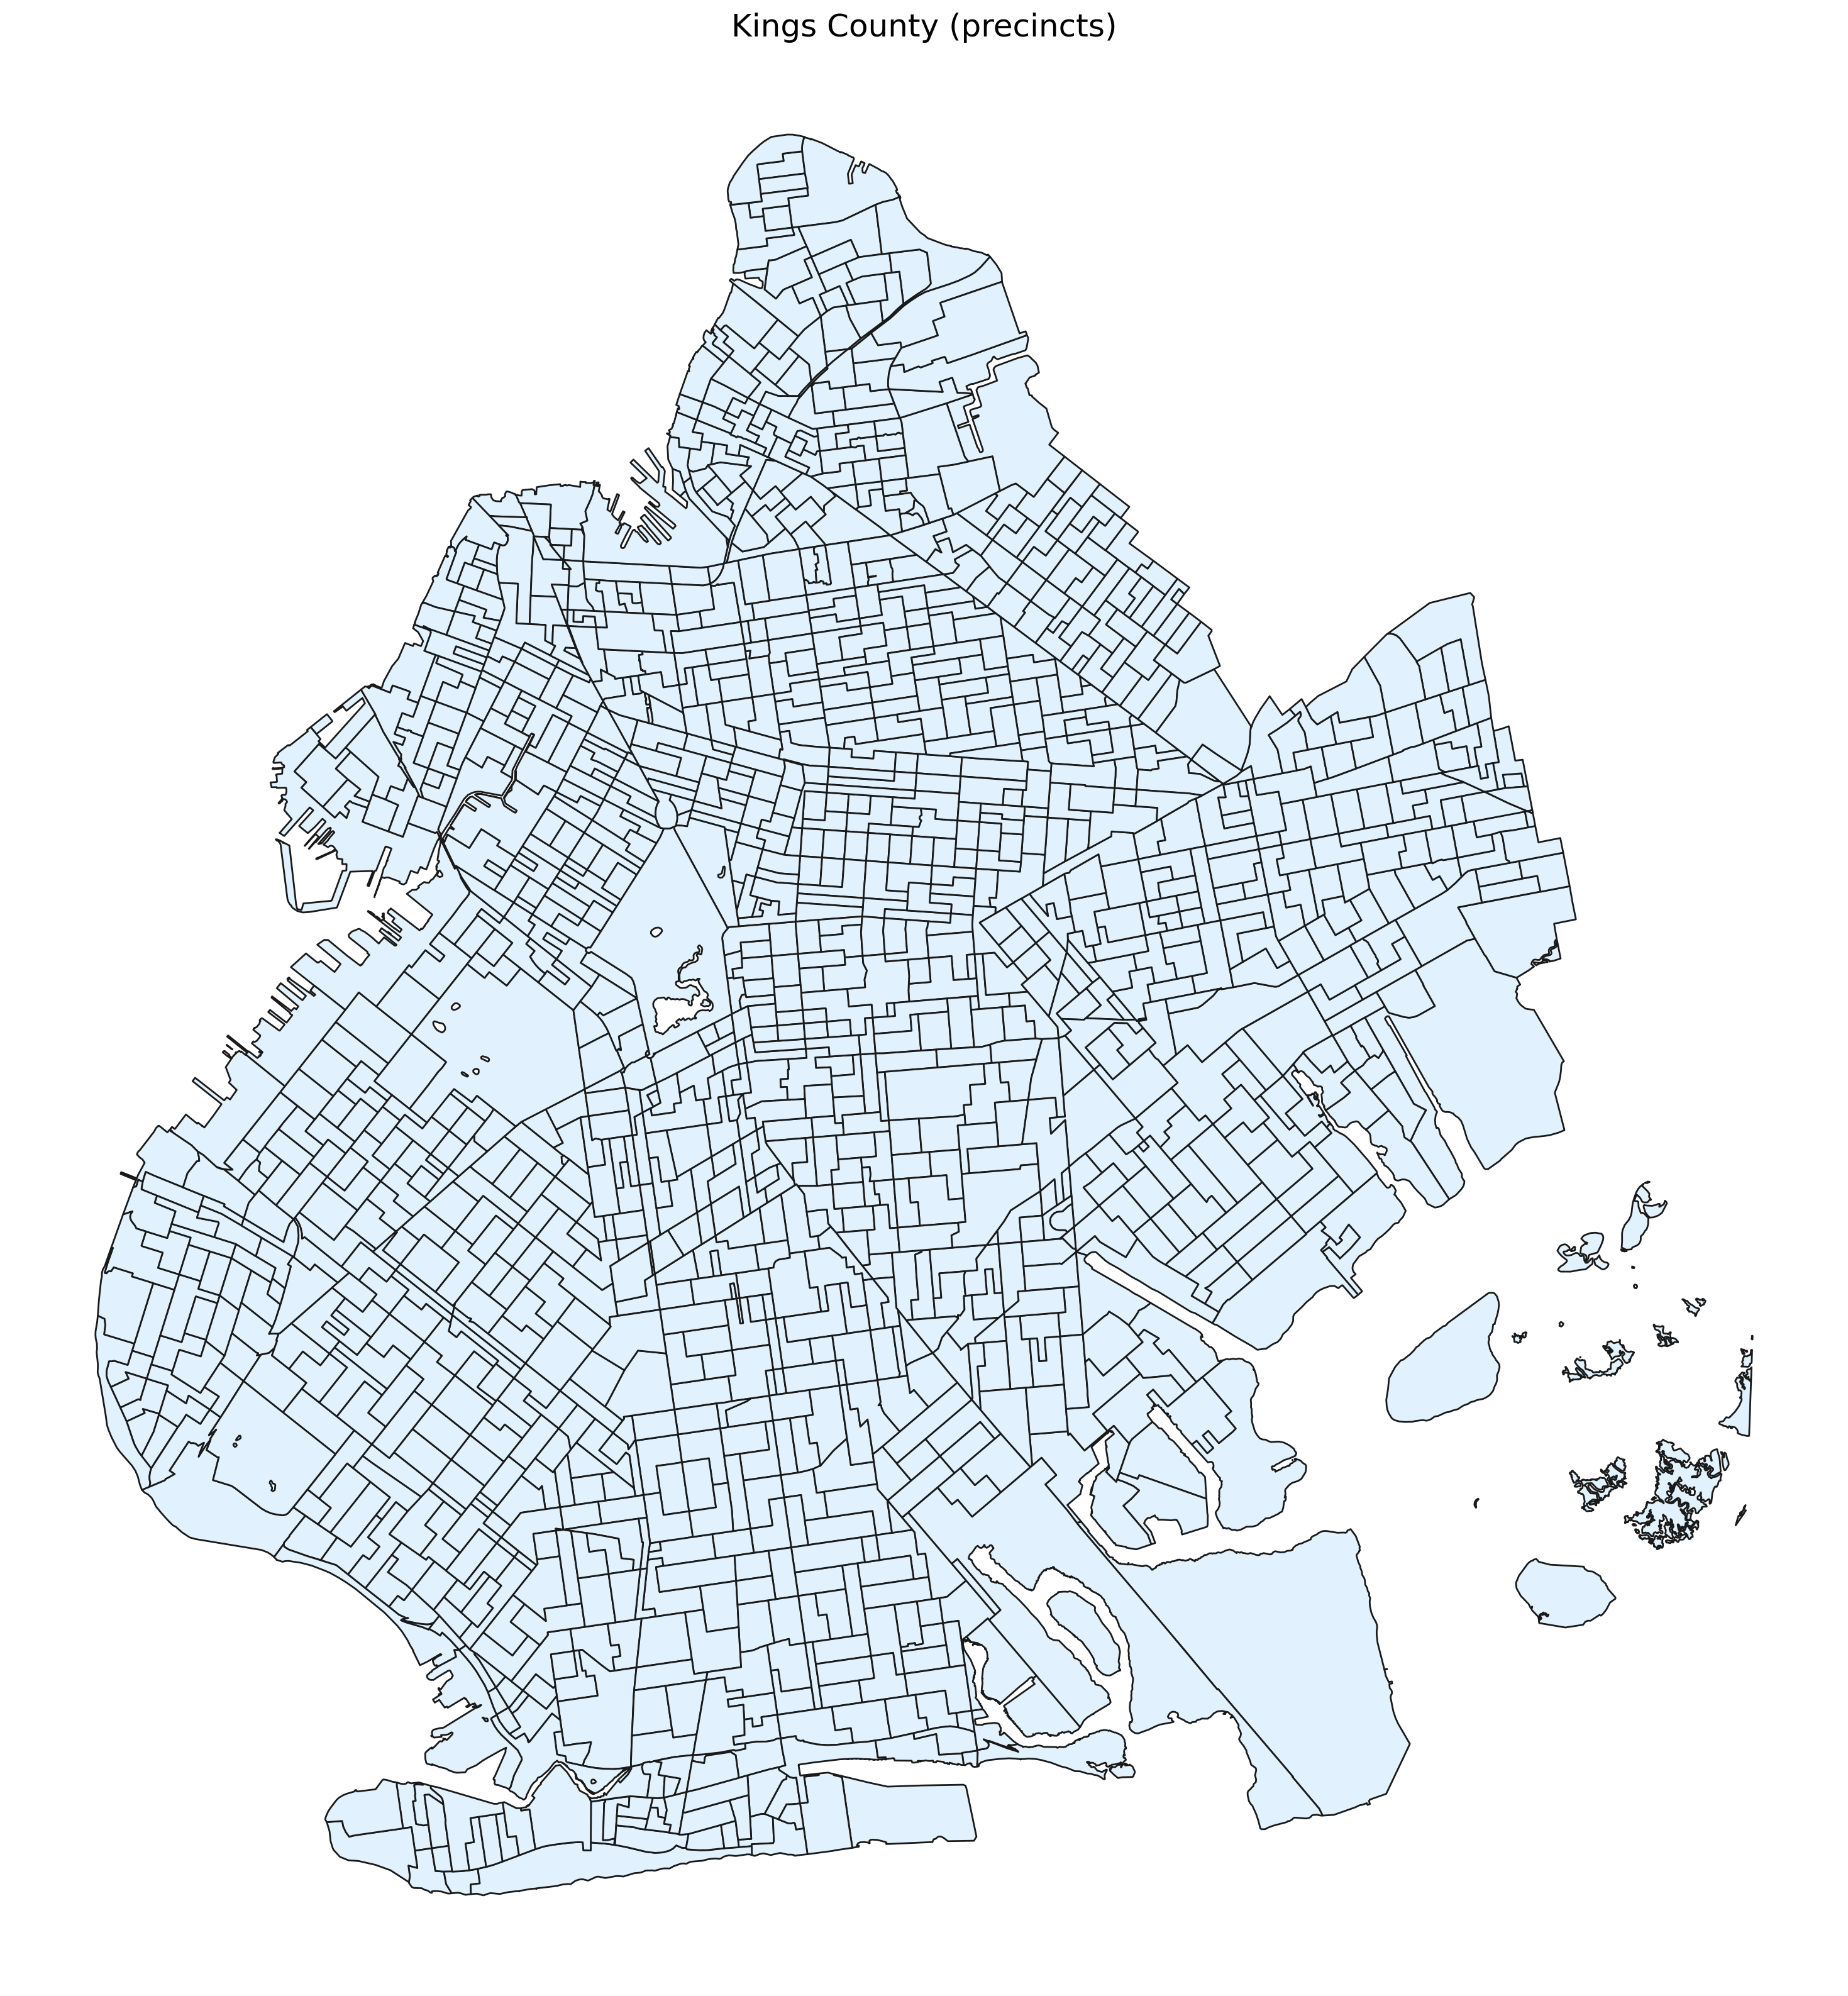

In [12]:
fig, ax = plt.subplots(figsize=(40, 20))
ax.set_title(f"{county_name} (precincts)", fontsize=18)
ax.axis('off')
county_precinct_gdf.plot(ax=ax, edgecolor="0.1", linewidth=1, color="#e1f1fd")
plt.axis('off')
plt.show()

The MAUP package will let us query the blocks and figure out what precinct they are in.  That way, we can take stats on the blocks and aggregate them up to precincts -- this will let us compare race to voting.

In [13]:
# maup.assign will take each block and figure out what precinct it is in
block_to_precinct_assignment = maup.assign(county_block_gdf, county_precinct_gdf)
block_to_precinct_assignment = block_to_precinct_assignment[~pd.isna(block_to_precinct_assignment)].astype(int)
block_to_precinct_assignment

GEOID20
360470053020001    6066
360471058041002    9069
360470352000001    7831
360470348001014    9093
360470702031005    8530
                   ... 
360470960001011    8460
360471220002015    8535
360471124002001    8563
360470018021011    5761
360470534004001    7935
Length: 9815, dtype: int64

In [14]:
pop_weights = (
    county_block_with_race_populated_gdf["total"]
    / block_to_precinct_assignment.map(county_block_with_race_populated_gdf["total"].groupby(block_to_precinct_assignment).sum())
).fillna(0)

In [15]:
pop_weights

GEOID20
360470001001000    0.011882
360470001001001    0.017110
360470001001002    0.000000
360470001001003    0.000000
360470001001004    0.006654
                     ...   
360471522003006    0.102273
360471522003007    0.057054
360471522003008    0.044939
360471522003009    0.051768
360471522003010    0.041035
Length: 9815, dtype: float64

In [16]:
aggregated_votes_df = maup.prorate(block_to_precinct_assignment, county_precinct_gdf[sen_columns], weights=pop_weights)

In [17]:
aggregated_votes_df

USSen_DEM  USSen_WOR  USSen_REP  USSen_CON  USSen_LAR  \
GEOID20                                                                  
360470053020001   0.000000   0.000000   0.000000   0.000000   0.000000   
360471058041002   0.000000   0.000000   0.000000   0.000000   0.000000   
360470352000001   0.000000   0.000000   0.000000   0.000000   0.000000   
360470348001014   0.000000   0.000000   0.000000   0.000000   0.000000   
360470702031005   0.000000   0.000000   0.000000   0.000000   0.000000   
...                    ...        ...        ...        ...        ...   
360470960001011   0.000000   0.000000   0.000000   0.000000   0.000000   
360471220002015   0.000000   0.000000   0.000000   0.000000   0.000000   
360471124002001  30.692199   1.495035   1.231206   0.263830   0.087943   
360470018021011   0.045455   0.090909   0.000000   0.000000   0.000000   
360470534004001  13.657771   1.593407  30.274725   1.934851   0.227630   

                 USSen_Writ  USSen_total  
GEOID20                                   
360470053020001    0.000000     0.000000  
360471058041002    0.000000     0.000000  
360470352000001    0.000000     0.000000  
360470348001014    0.000000     0.000000  
360470702031005    0.000000     0.000000  
...                     ...          ...  
360470960001011    0.000000     0.000000  
360471220002015    0.000000     0.000000  
360471124002001    0.000000    33.770213  
360470018021011    0.000000     0.136364  
360470534004001    0.113815    47.802198  

[9815 rows x 7 columns]

In [18]:
county_block_with_election_gdf = county_block_with_race_gdf.join(aggregated_votes_df[["USSen_DEM","USSen_WOR","USSen_total"]])
county_block_with_election_gdf["sen_demwor_pct"] = (
    100 * (county_block_with_election_gdf["USSen_DEM"]+county_block_with_election_gdf["USSen_WOR"])
    / county_block_with_election_gdf["USSen_total"]
)

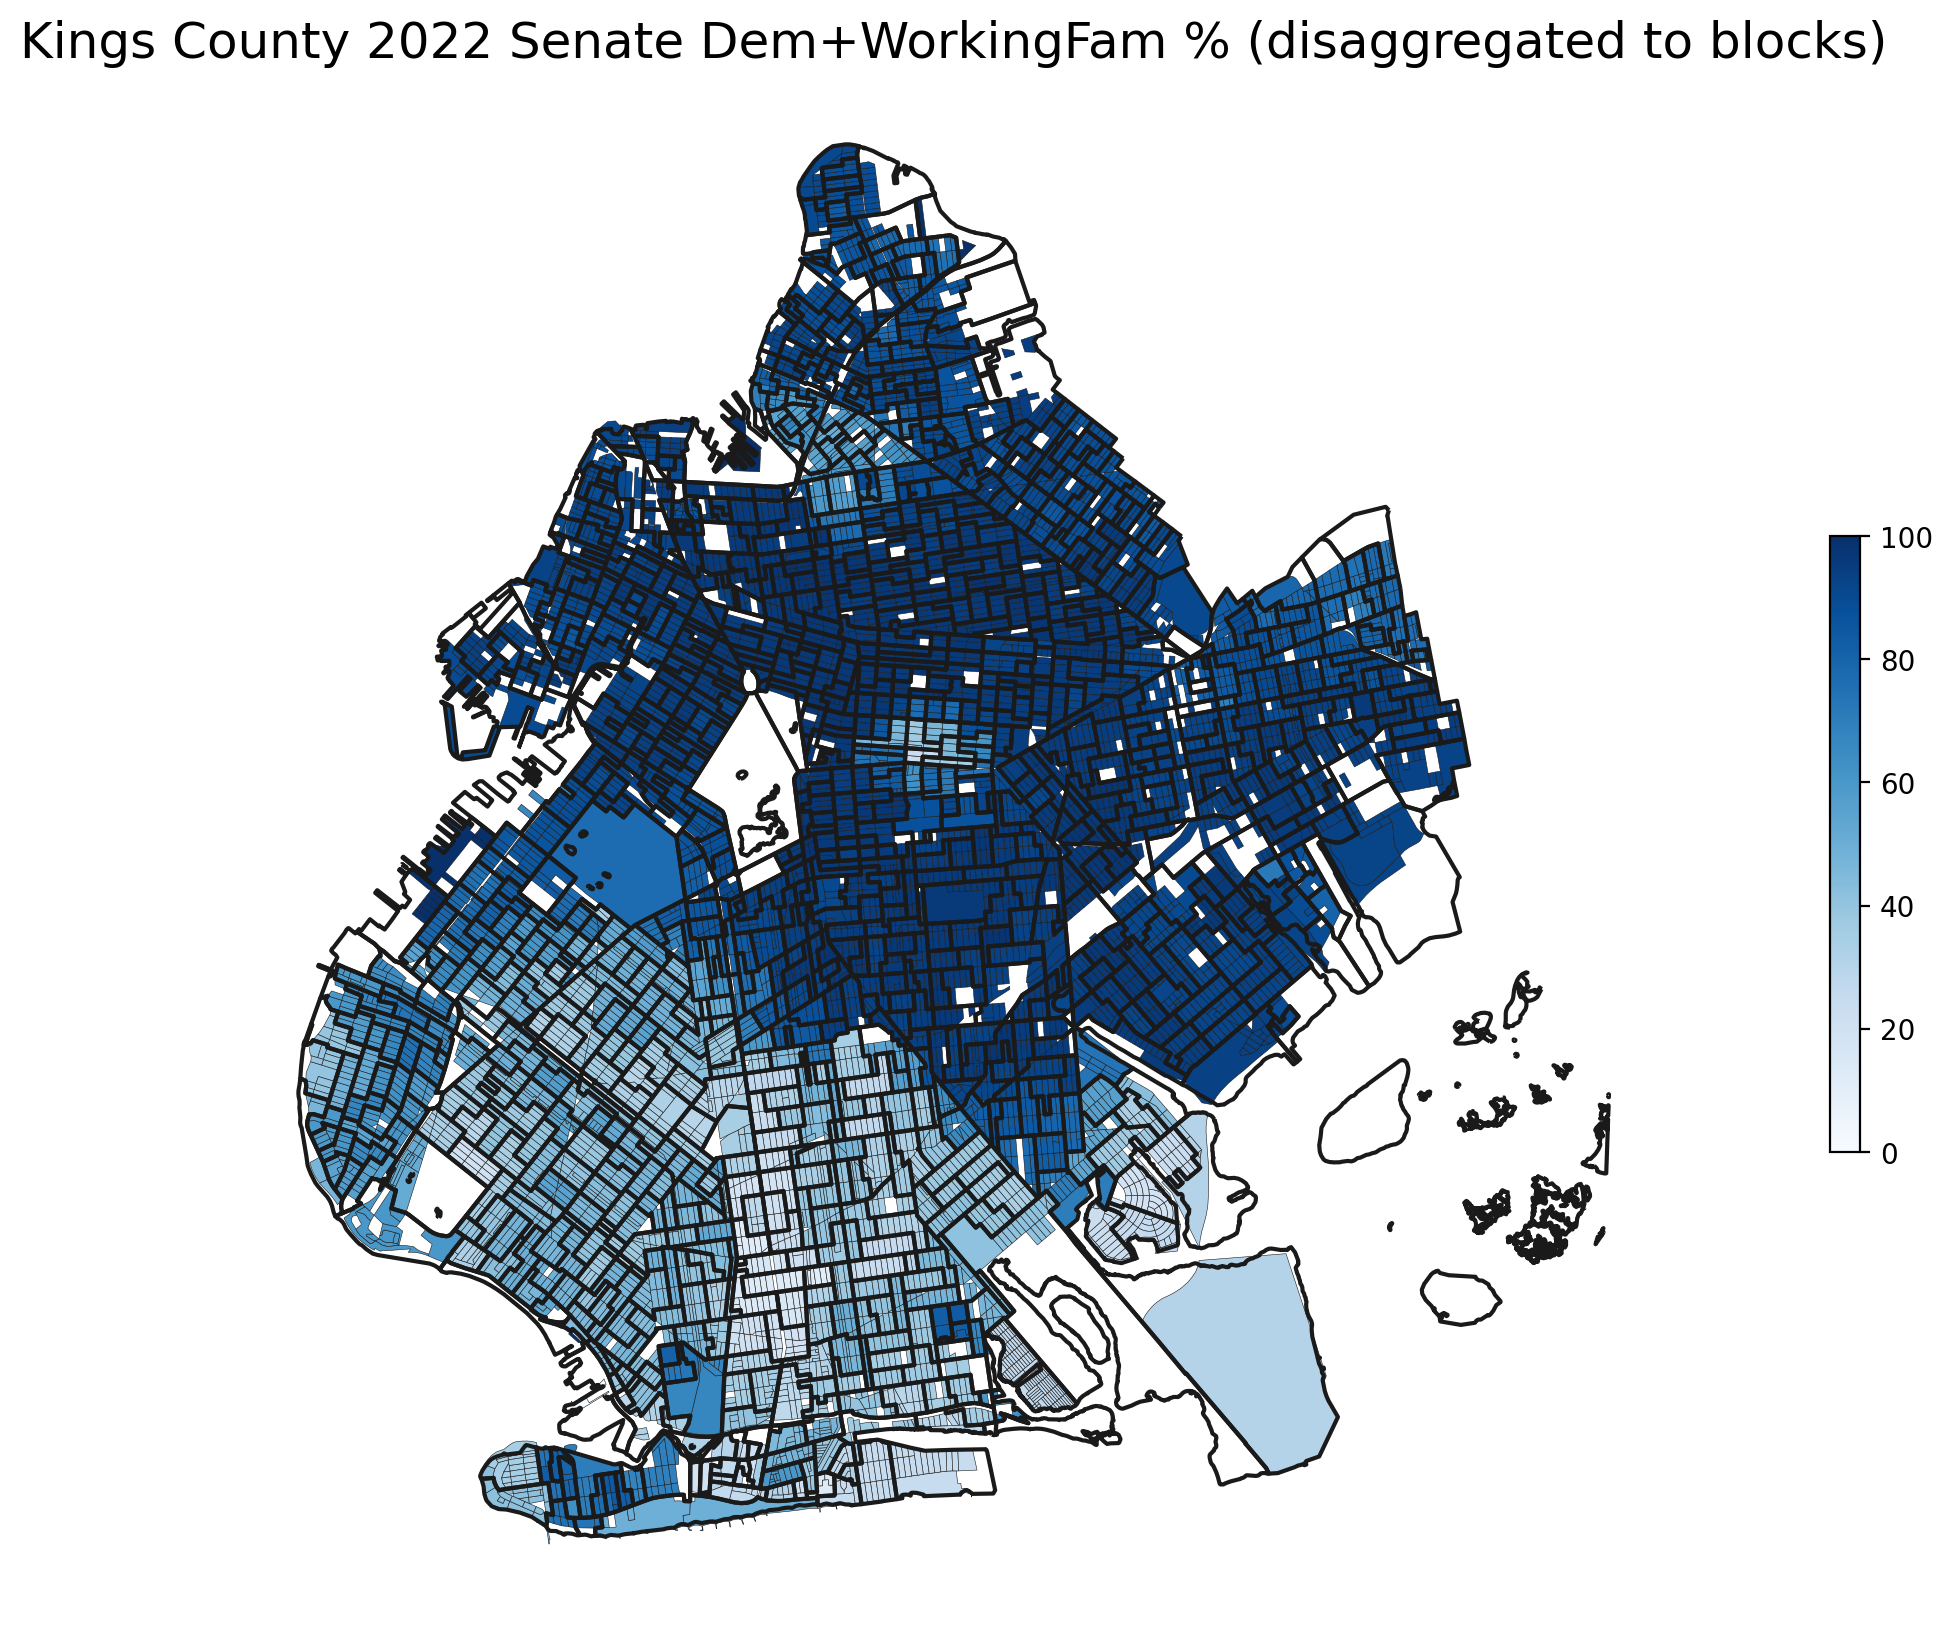

In [19]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.axis('off')
ax.set_title(f"{county_name} 2022 Senate Dem+WorkingFam % (disaggregated to blocks)", fontsize=18)
county_block_with_election_gdf[~pd.isna(county_block_with_election_gdf["sen_demwor_pct"])].plot(
    ax=ax,
    column="sen_demwor_pct",
    vmin=0,
    vmax=100,
    **choropleth_style,
)
county_precinct_gdf.boundary.plot(
    ax=ax,
    edgecolor="0.1",
    linewidth=1.5,
)
plt.show()

In [20]:
aggregated_votes_df["tract"] = aggregated_votes_df.index.str.slice(0, 11)

In [21]:
aggregated_tract_votes_df = aggregated_votes_df.groupby("tract")[sen_columns].sum()
aggregated_tract_votes_df

USSen_DEM   USSen_WOR   USSen_REP  USSen_CON  USSen_LAR  \
tract                                                                    
36047000100  1558.538829  235.336135  193.901335   9.608714  16.835505   
36047000200    94.475314   20.346497   24.658869   2.680281   2.103785   
36047000301  1350.000408  224.601212  137.156974  12.057659   7.355531   
36047000501  1300.674395  204.873967  132.738919  16.264190   8.442001   
36047000502  1036.682356  192.875709  109.639555  10.454243   5.071409   
...                  ...         ...         ...        ...        ...   
36047121400   475.443191   17.181305   32.908541   0.727236   2.181708   
36047122000   856.156809   21.418695   53.891459   2.272764   3.818292   
36047123700   695.000000   53.000000  483.000000  30.000000   4.000000   
36047150200   689.393212  281.995395  149.535763  21.325280   4.882189   
36047152200   661.782647  285.433403   77.268361  11.369354   6.292375   

             USSen_Writ  USSen_total  
tract                                 
36047000100    1.755448  2015.975966  
36047000200    0.201089   144.465834  
36047000301    4.662339  1735.834122  
36047000501    6.183161  1669.176633  
36047000502    2.750711  1357.473983  
...                 ...          ...  
36047121400    0.000000   528.441982  
36047122000    2.000000   939.558018  
36047123700   15.000000  1280.000000  
36047150200    2.227259  1149.359099  
36047152200    4.532016  1046.678157  

[804 rows x 7 columns]

In [22]:
aggregated_tract_votes_df["sen_demwor_pct"] = (
    100 * aggregated_tract_votes_df[["USSen_DEM","USSen_WOR"]].sum(axis=1)
    / aggregated_tract_votes_df["USSen_total"]
)

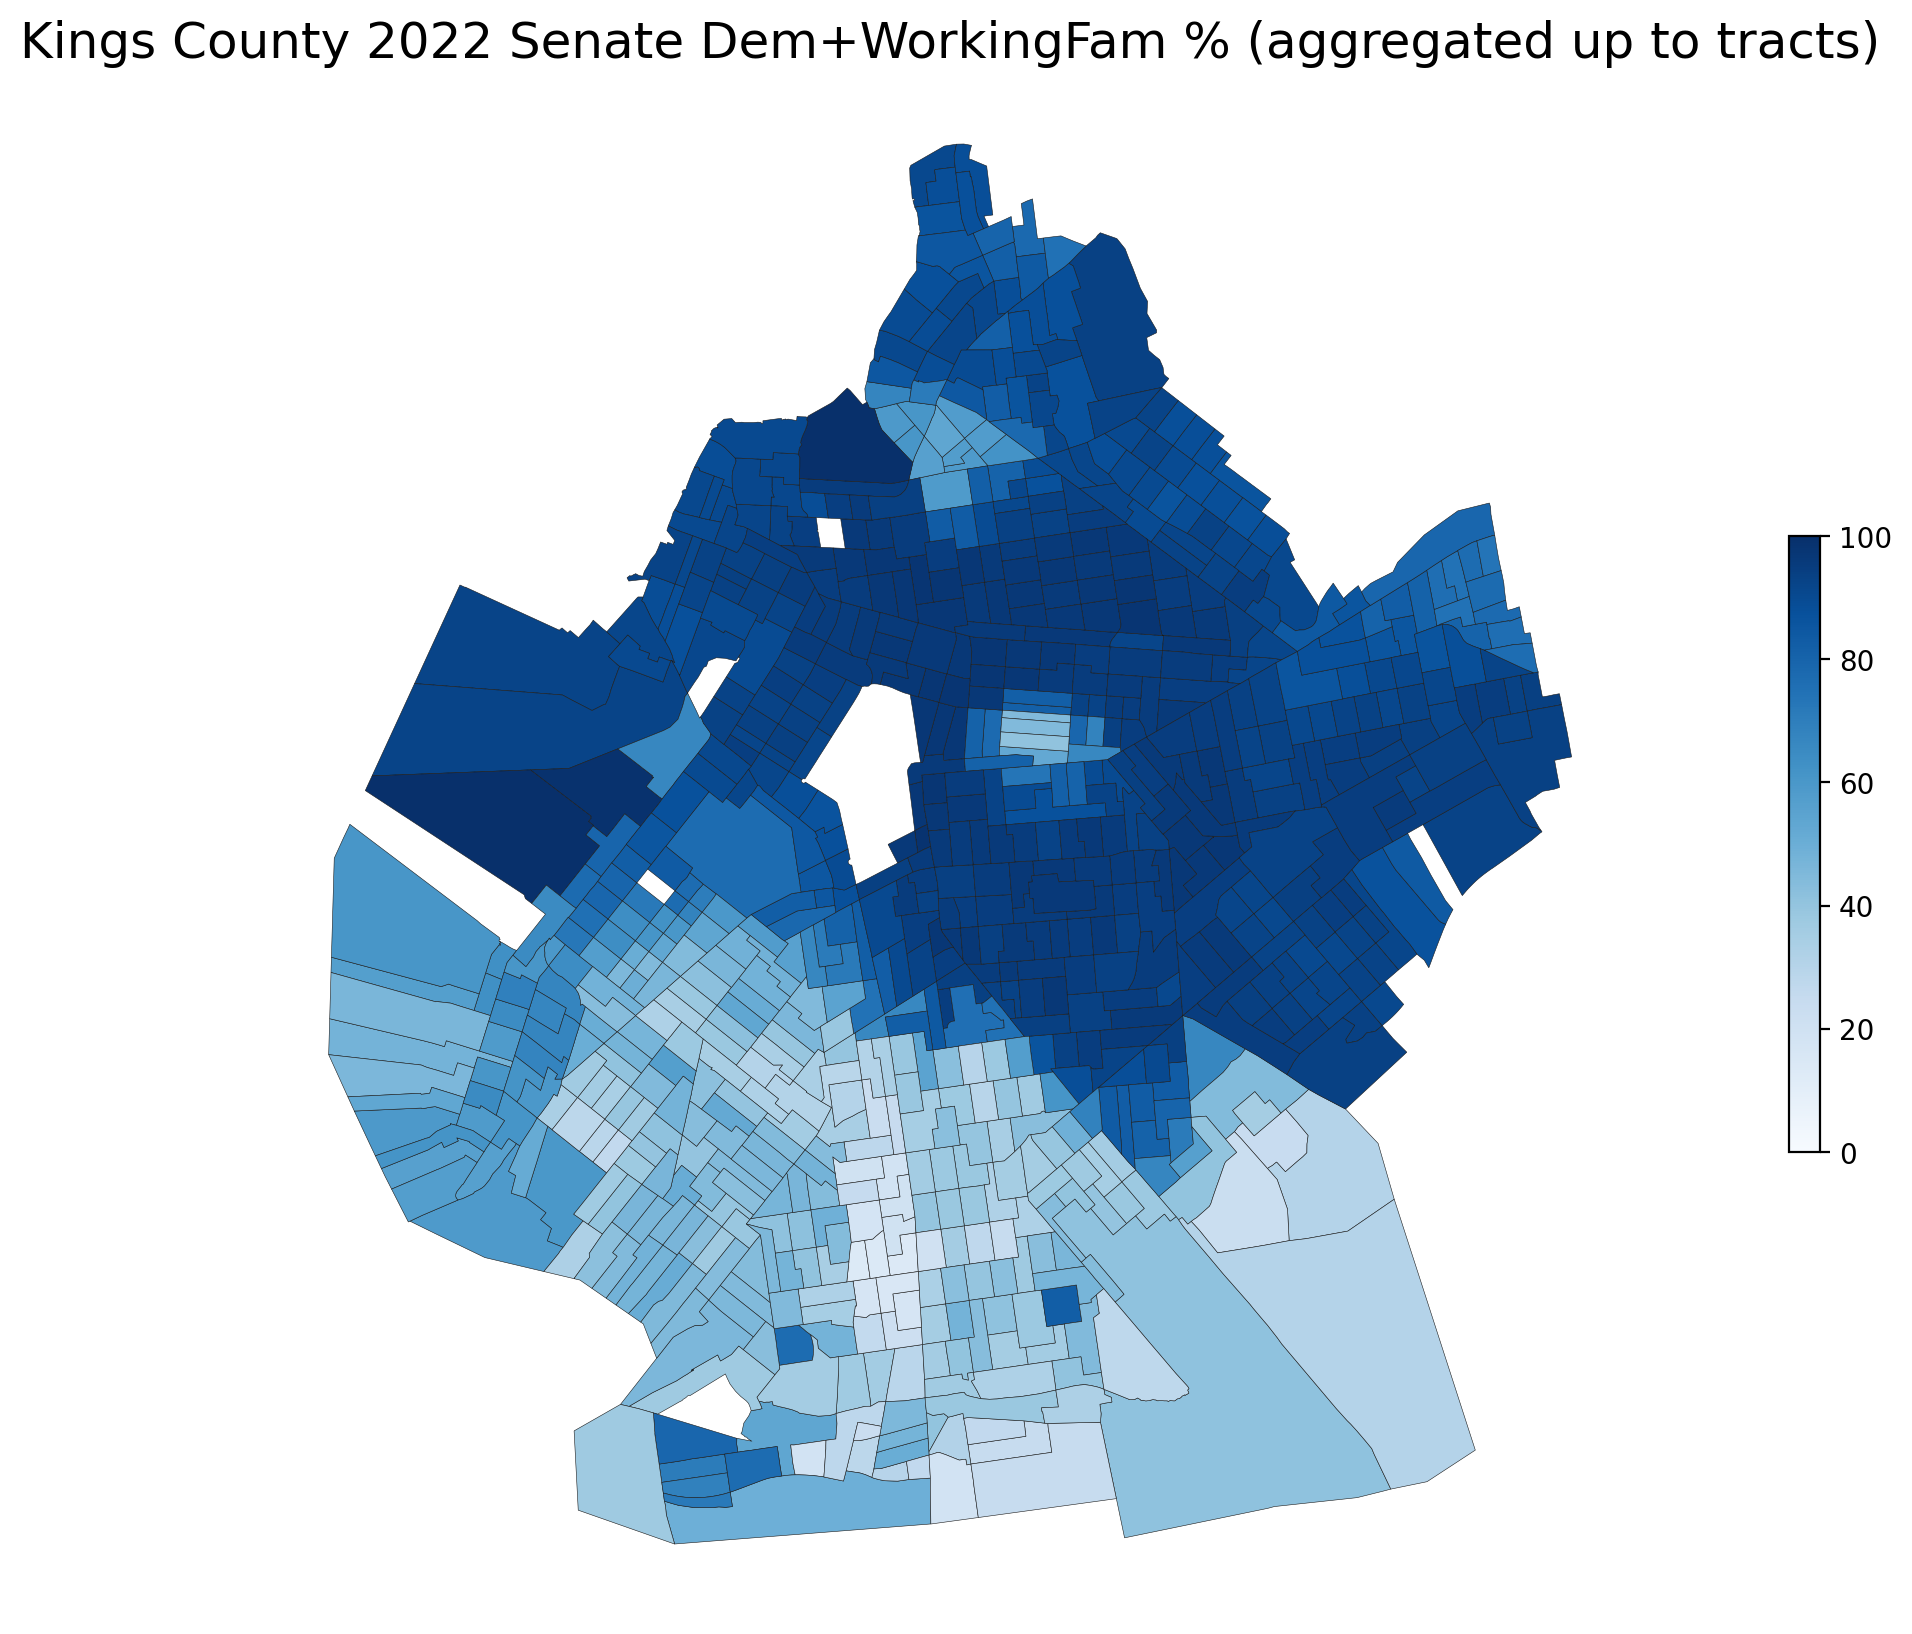

In [23]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.axis('off')
ax.set_title(f"{county_name} 2022 Senate Dem+WorkingFam % (aggregated up to tracts)", fontsize=18)
county_tract_gdf.join(aggregated_tract_votes_df).plot(
    ax=ax,
    column="sen_demwor_pct",
    vmin=0,
    vmax=100,
    **choropleth_style,
)
plt.show()

Kind of interesting that the southern half of Brooklyn doesn't seem to have supported Chuck Schumer.  Let's see if that's predicted by age or income.

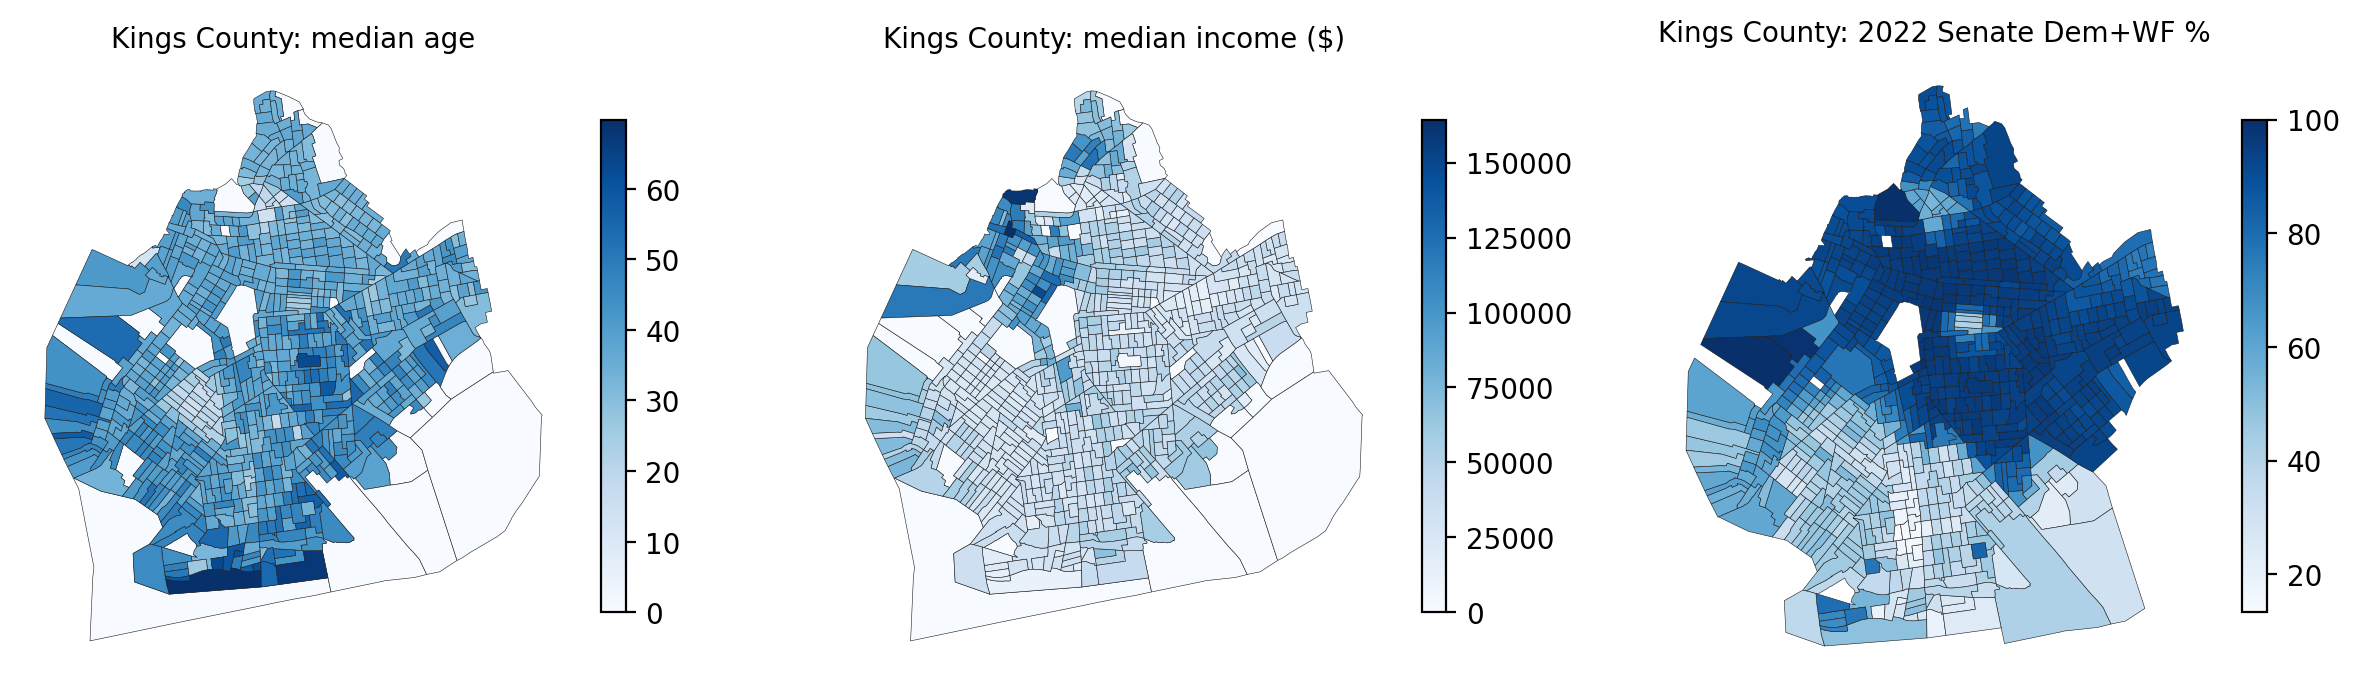

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(15, 8))
axes[0].axis('off')
axes[0].set_title(f"{county_name}: median age", fontsize=10)

county_tract_with_acs_gdf.plot(
    ax=axes[0],
    column="med_age",
    vmin=0,
    **choropleth_style,
)

axes[1].axis('off')
axes[1].set_title(f"{county_name}: median income ($)", fontsize=10)
county_tract_with_acs_gdf.plot(
    ax=axes[1],
    column="med_income",
    vmin=0,
    **choropleth_style,
)

axes[2].axis('off')
axes[2].set_title(f"{county_name}: 2022 Senate Dem+WF %", fontsize=10)
county_tract_gdf.join(aggregated_tract_votes_df).plot(
    ax=axes[2],
    column="sen_demwor_pct",
    **choropleth_style,
)
plt.show()

Not really -- how about race?

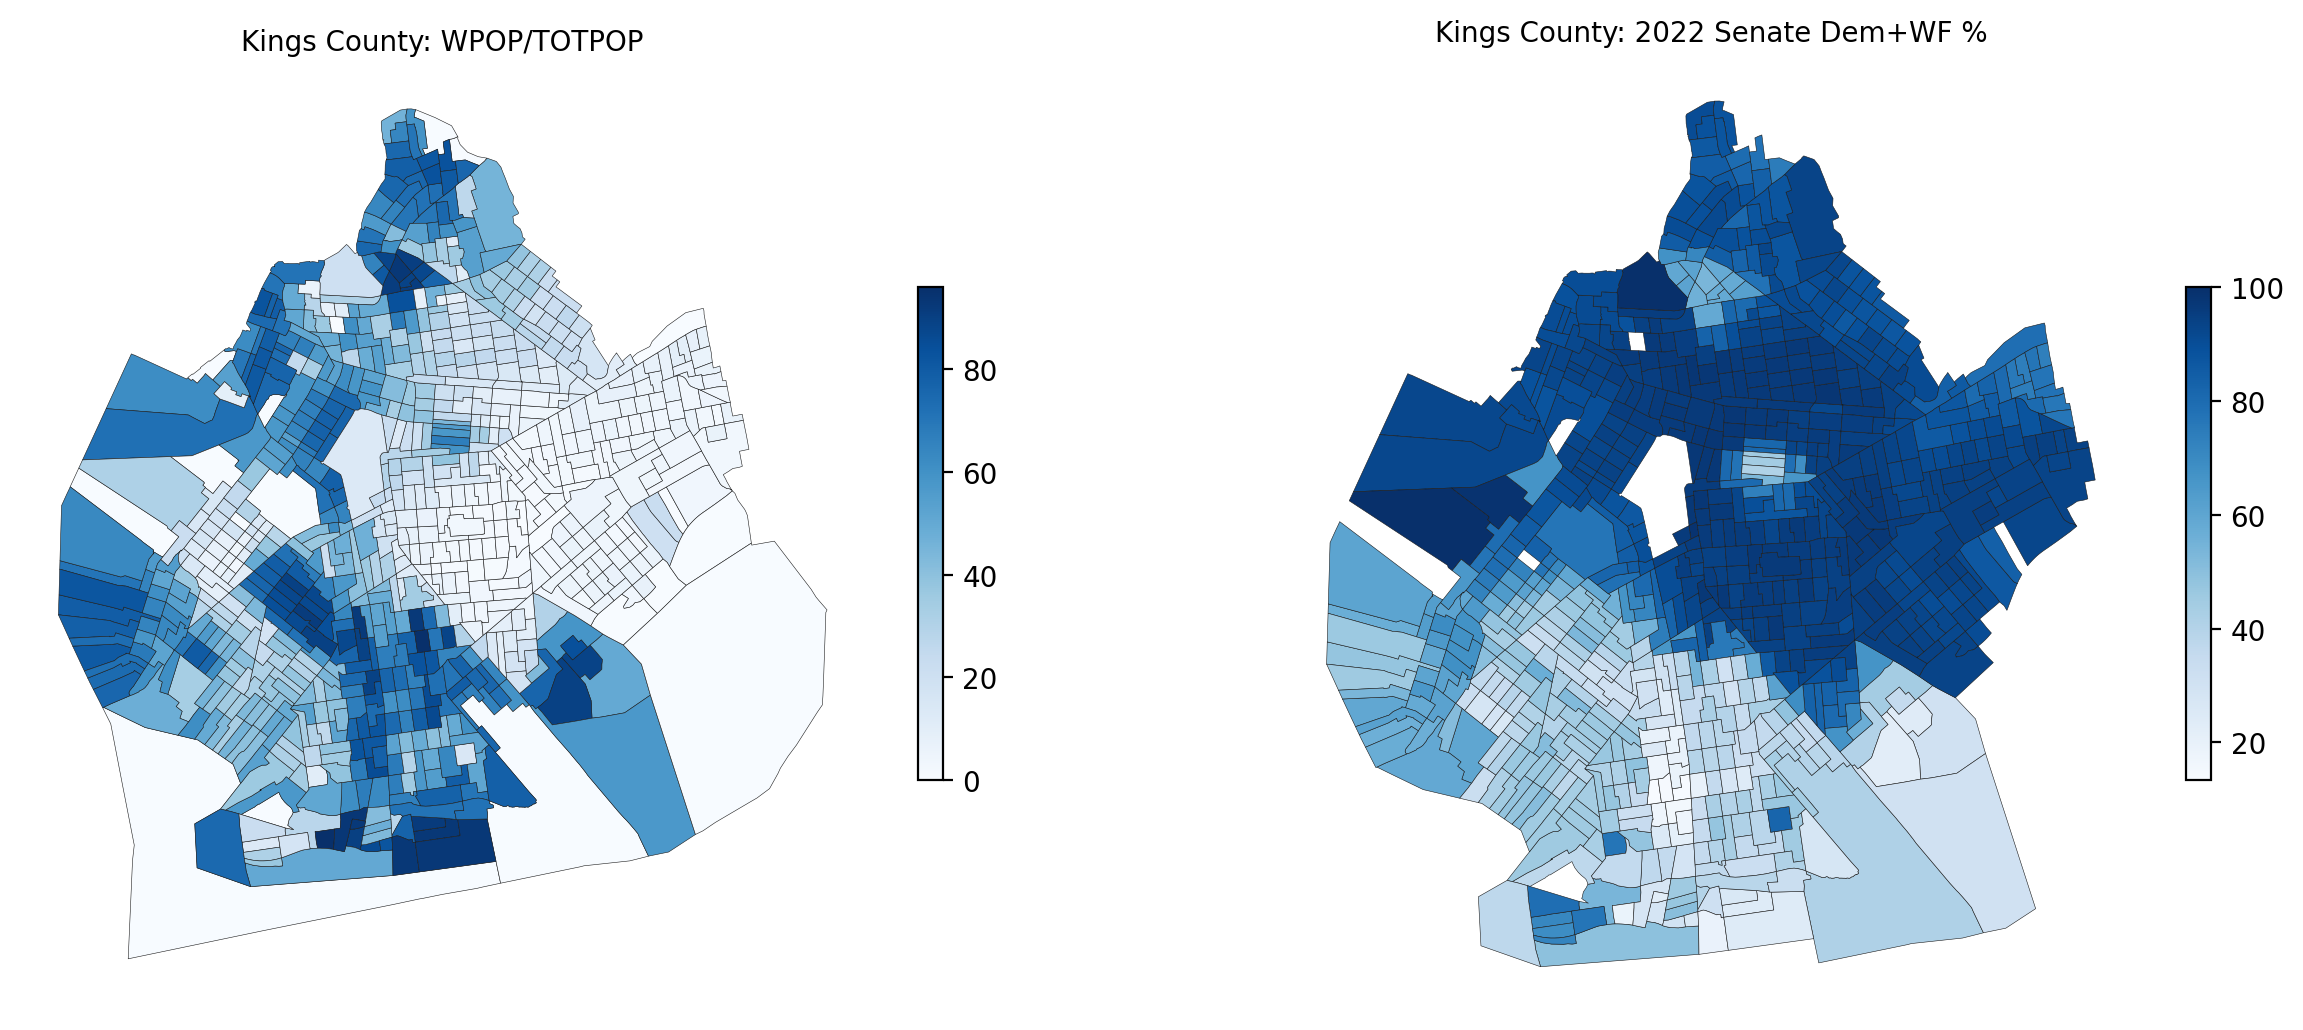

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
axes[0].axis('off')
axes[0].set_title(f"{county_name}: WPOP/TOTPOP", fontsize=10)

county_tract_with_acs_gdf.plot(
    ax=axes[0],
    column="white_pct",
    vmin=0,
    **choropleth_style,
)



axes[1].axis('off')
axes[1].set_title(f"{county_name}: 2022 Senate Dem+WF %", fontsize=10)
county_tract_gdf.join(aggregated_tract_votes_df).plot(
    ax=axes[1],
    column="sen_demwor_pct",
    **choropleth_style,
)
plt.show()